# The normal distribution

## About this page

This is a Jupyter Notebook.  It can be run as an interactive demo, or you can
read it as a web page.

You don't need to understand the code on this page, the text will tell you
what the code is doing.

## Running the Notebook as a demo

The Notebook contains *cells*.  This is a *text* cell.  The next cell is a
*code* cell.

Press the Shift key with the Enter (or Return) key to execute a cell and move
to the next cell.

You can also run a cell with the Run icon at the top of the Window.

The next cell contains code that gets us set up for doing the histograms and
plots.

In [1]:
# Execute this cell by pressing Shift and Enter at the same time.
# Libraries for plotting, statistical distributions
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')

## Back to the normal distribution

We sample one million values from a [normal
distribution](https://en.wikipedia.org/wiki/Normal_distribution).  The
particular normal distribution we sample from a mean of 0 and a *standard
deviation* of 1.  This is called a [standard normal
distribution](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution).

In [2]:
number_of_values = 1000000
values = np.random.normal(0, 1, size=number_of_values)

The first 10 values of the one million.  They vary between around -2 and 2,
with values near zero being more likely than values further away.

In [3]:
values[:10]

array([ 0.57994291,  1.11793855, -1.67192842,  0.34928611,  0.70334265,
        1.36986659, -1.44951484, -0.41865583, -0.47728545, -0.88822105])

Plot all the values as a histogram with 250 bins:

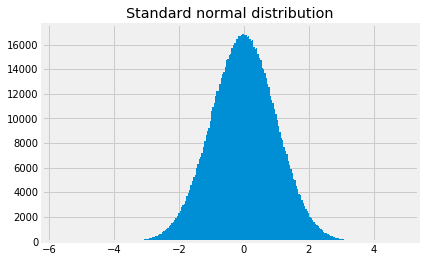

In [4]:
plt.hist(values, bins=250);
plt.title('Standard normal distribution');

What proportion of values are between -1 and 1?

First we find which of the one million values are between -1 and 1.

In [5]:
betweens = (values >= -1) & (values <= 1)

Next we show where these values fall on the histogram.

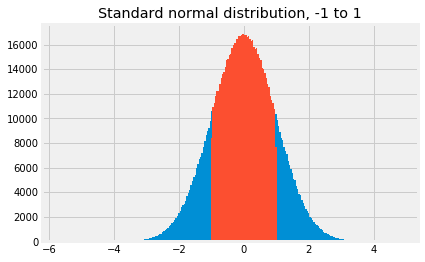

In [6]:
# Where are the between values?
counts, bins, patches = plt.hist(values, bins=250)
plt.hist(values[betweens], bins=bins, lw=0)
plt.title('Standard normal distribution, -1 to 1');

What proportion of all values fall between -1 and 1?

In [7]:
# Proportion of values between -1 and 1
np.count_nonzero(betweens) / number_of_values

0.683407

This proportion \- around 0.68 or 68% \- is characteristic of the normal
distribution.  The rule is: 68% of values in a normal distribution fall
between -1 and 1 standard deviations from the mean.

Around 95% of values fall between -1.96 and 1.96 standard deviations:

0.950189

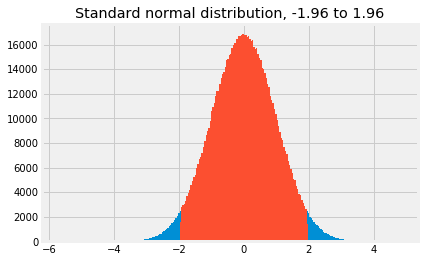

In [8]:
betweens = (values >= -1.96) & (values <= 1.96)
counts, bins, patches = plt.hist(values, bins=250)
plt.hist(values[betweens], bins=bins, lw=0)
plt.title('Standard normal distribution, -1.96 to 1.96')
np.count_nonzero(betweens) / number_of_values

More than 99% of values fall between -3 and 3 standard deviations:

0.997335

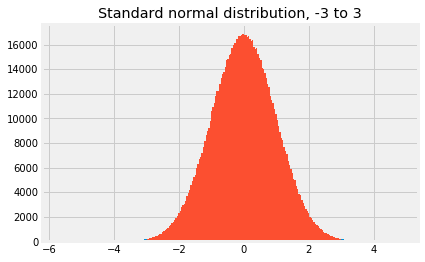

In [9]:
betweens = (values >= -3) & (values <= 3)
counts, bins, patches = plt.hist(values, bins=250)
plt.hist(values[betweens], bins=bins, lw=0)
plt.title('Standard normal distribution, -3 to 3')
np.count_nonzero(betweens) / number_of_values

Notice that you can hardly see the blue tails here, because the red values between -3 and 3 take up so much of the area.

What if the distribution doesn't have a mean of 0 or a standard deviation of
1?

In [10]:
values_around_10 = np.random.normal(10, 3, size=number_of_values)

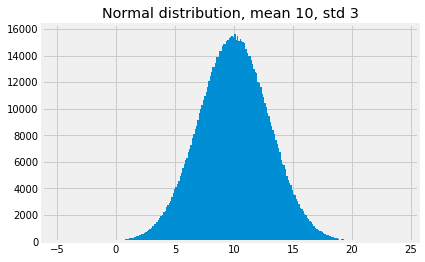

In [11]:
plt.hist(values_around_10, bins=250)
plt.title('Normal distribution, mean 10, std 3');

Now the center is at 10, and one standard deviation to the left of center is 10 - 3 = 7.

The rule above works by multiplying the standard deviation by 1.96, and subtracting / adding to the mean.

In [12]:
left_threshold = 10 - 3 * 1.96
right_threshold = 10 + 3 * 1.96
betweens_around_10 = (values_around_10 >= left_threshold) & (values_around_10 <= right_threshold)

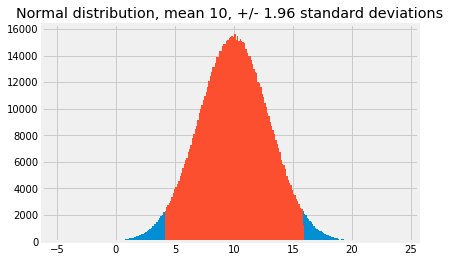

In [13]:
# Where are the between values?
counts, bins, patches = plt.hist(values_around_10, bins=250)
plt.hist(values_around_10[betweens_around_10], bins=bins, lw=0)
plt.title('Normal distribution, mean 10, +/- 1.96 standard deviations');

In [14]:
# Proportion of values between -1.96 and 1.96 standard deviations
np.count_nonzero(betweens_around_10) / number_of_values

0.949827

## What's special about the normal distribution?

Let's get some values from some not-normal distributions.

Here's a not-normal distribution, the "chi square" distribution.  Again, I'm
getting one million values from this distribution, then doing a histogram of
the values.

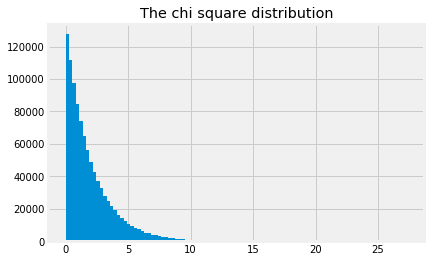

In [15]:
distribution = np.random.chisquare(2, size=number_of_values)
plt.hist(distribution, bins=100)
plt.title('The chi square distribution');

In [16]:
# The first 10 values
distribution[:10]

array([ 1.92062031,  4.00206006,  3.13523187,  0.36154019,  0.64141852,
        2.36319382,  1.3546437 ,  0.87352509,  3.29380689,  1.2572195 ])

This is definitely not a normal distribution.  Now, I'm going to take one
million samples, from this distribution, 50 times.  I'll call each set of one
million samples, a *lot*.

In [17]:
# Take a *lot* of one million samples from the chi square distribution
# Do this 50 times, and collect the results.
lots = []
for i in range(50):
    lot = np.random.chisquare(2, size=number_of_values)
    lots.append(lot)

Now I add the lots together.  I will end up with one million values, where
the first value is the first (of one million) values in the first lot, plus
the first value in the second lot, up through the 50 lots.  What shape do
you think I will get, if I do a histogram of these one million added values?

In [18]:
# Add the 50 lots together, to get one million added values.
added = np.zeros(number_of_values)
for lot in lots:
    # Add the lot
    added = added + lot

Now the histogram:

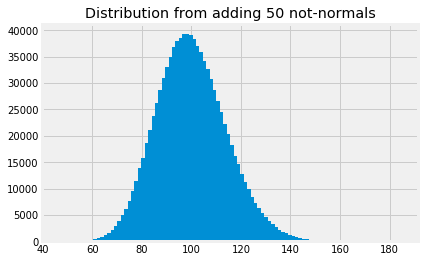

In [19]:
plt.hist(added, bins=100)
plt.title('Distribution from adding 50 not-normals');

It's (more or less) a normal distribution.  When we add multiple values from
not-normal distributions, we end up with something much more like a normal
distribution.  This is called the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).  It is the reason that we see normal distributions so often in biology; many things we measure are affected by many factors that add together.  This tends to make the distribution of the measurement become more like a normal distribution.